In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Raw surface point data & parameters
=====

In [2]:
timeStep = 0.1 #us
diffConst = 0.001 #um^2/us
numStep = 10000
samplingRate = 100000/timeStep
membraneBendingConst = 4.17

df = pd.read_csv("surfacepoint.csv", header = None)
df = df.iloc[:, :-1]
df

,0,1,2,3,4,5,6,7,8,9,...,5771,5772,5773,5774,5775,5776,5777,5778,5779,5780
0,-19.500000,-19.918584,0.000000,-18.500000,-19.918584,0.000000,-17.500000,-19.918584,0.000000,-16.500000,...,0.000000,18.500000,19.918584,0.000000,19.500000,19.918584,0.000000,20.500000,19.918584,0.000000
1,-19.569135,-19.899881,0.105935,-18.546277,-19.939072,-0.050589,-17.516614,-19.868552,-0.002827,-16.433511,...,0.014564,18.456961,19.867012,-0.049498,19.579932,19.918178,-0.063449,20.468676,19.976909,-0.023591
2,-19.532303,-19.877809,0.024413,-18.620416,-19.883343,-0.035546,-17.451539,-19.887849,-0.004536,-16.455569,...,-0.046076,18.504704,19.844813,-0.009315,19.502132,19.930431,0.048760,20.459882,19.947164,0.001363
3,-19.508036,-19.855525,0.037458,-18.387855,-19.995617,-0.066175,-17.547501,-19.913736,0.019761,-16.509680,...,0.042508,18.521050,19.880913,0.079155,19.480965,19.863132,-0.001752,20.479916,19.871352,-0.016192
4,-19.501203,-19.988420,0.072062,-18.548097,-19.963914,-0.007384,-17.521166,-20.031040,0.116213,-16.470501,...,0.007025,18.428083,20.004513,0.041158,19.548196,19.827381,0.049228,20.482692,19.885706,0.008457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-19.415719,-19.839919,-0.026641,-18.394675,-19.836268,0.013418,-17.501013,-19.852804,0.008303,-16.555161,...,-0.052267,18.498729,19.944399,0.009707,19.461433,19.983931,0.067946,20.473804,20.004461,0.018569
9997,-19.494883,-19.889960,-0.047906,-18.539017,-19.912553,0.128016,-17.520773,-19.837124,0.051368,-16.597045,...,-0.038246,18.426574,19.892589,0.023774,19.569958,20.013954,-0.000201,20.448613,20.021903,-0.009105
9998,-19.478932,-19.867807,0.020954,-18.524130,-19.800755,-0.076186,-17.548313,-19.842550,0.006831,-16.555980,...,-0.049779,18.410925,19.853482,-0.010236,19.389941,20.022385,0.039035,20.422251,19.968690,-0.023422
9999,-19.457104,-19.863386,0.098224,-18.344261,-19.886064,-0.005942,-17.532910,-19.917413,0.018212,-16.529061,...,-0.054601,18.474242,19.883790,-0.049882,19.557057,19.961870,0.025952,20.427567,20.046283,-0.022663


Extract $h(x,y)$ 
====

In [3]:
import matplotlib.pyplot as plt
df_z = df.iloc[:,2::3]
df_z.columns = range(df_z.columns.size)
df_z

,0,1,2,3,4,5,6,7,8,9,...,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.105935,-0.050589,-0.002827,0.004433,-0.027167,-0.036525,-0.004924,-0.008141,-0.014832,-0.019372,...,0.013687,-0.025128,0.025538,0.007065,-0.030332,-0.012613,0.014564,-0.049498,-0.063449,-0.023591
2,0.024413,-0.035546,-0.004536,0.013593,0.021984,0.006163,0.091444,-0.044965,0.091662,-0.052085,...,-0.033346,0.025203,-0.062053,0.004544,-0.027503,0.117147,-0.046076,-0.009315,0.048760,0.001363
3,0.037458,-0.066175,0.019761,-0.030208,0.051745,-0.022381,0.008245,0.046656,0.039129,-0.004242,...,-0.026353,-0.049514,-0.104461,-0.058818,0.022279,0.000612,0.042508,0.079155,-0.001752,-0.016192
4,0.072062,-0.007384,0.116213,-0.041345,-0.099512,-0.059960,-0.047584,-0.037244,-0.067421,0.068889,...,-0.126155,-0.091435,-0.028586,0.004628,-0.047538,-0.094582,0.007025,0.041158,0.049228,0.008457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-0.026641,0.013418,0.008303,-0.158286,-0.108632,0.000170,-0.036075,-0.026433,0.054112,-0.060369,...,-0.037019,0.016876,-0.059098,-0.110700,0.079520,-0.017420,-0.052267,0.009707,0.067946,0.018569
9997,-0.047906,0.128016,0.051368,-0.018737,0.008111,-0.046209,-0.126448,0.002888,0.065423,-0.051130,...,-0.051155,-0.055524,-0.083267,-0.033489,-0.127955,-0.071662,-0.038246,0.023774,-0.000201,-0.009105
9998,0.020954,-0.076186,0.006831,-0.088406,-0.053324,0.039399,-0.070120,0.035972,-0.049529,-0.052433,...,-0.011047,0.095479,0.133058,-0.033351,-0.115780,-0.039029,-0.049779,-0.010236,0.039035,-0.023422
9999,0.098224,-0.005942,0.018212,0.026294,-0.122048,-0.014350,0.062065,0.012038,-0.030976,-0.023975,...,-0.017677,0.022676,-0.067118,-0.067479,-0.071111,-0.014297,-0.054601,-0.049882,0.025952,-0.022663


h(x,y)~t
=

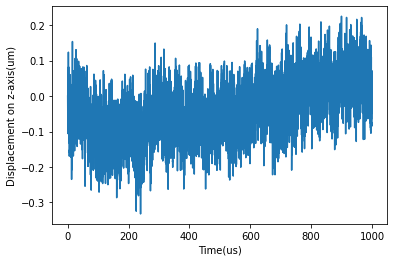

In [4]:
#plot h(x,y)~t
#pick (x,y,z)*
index = 245

timeScale = np.linspace(0, numStep*timeStep, numStep+1)

plt.plot(timeScale, df.iloc[:,index])
plt.xlabel("Time(us)")
plt.ylabel("Displacement on z-axis(um)")
plt.show()

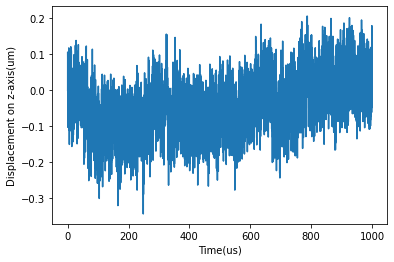

In [5]:
#plot h(x,y)~t
#pick (x,y,z)*
index = 2

timeScale = np.linspace(0, numStep*timeStep, numStep+1)

plt.plot(timeScale, df.iloc[:,index])
plt.xlabel("Time(us)")
plt.ylabel("Displacement on z-axis(um)")
plt.show()

The periodic BC only allows for drifting of the membrane but not rotating. This means that the displacement can be largely correlated to membrane drifting over long period of simulation. To eliminate the effect of overall drifitng, side length is used for FFT.

l(x1,y1,x2,y2)~t
=

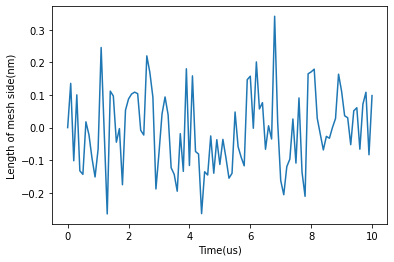

In [6]:
#plot l(x1,y1,x2,y2)~t
#first 500 us
index1 = 241
index2 = 242

timeScale = np.linspace(0, numStep*timeStep/100, int(numStep/100)+1)

def getPointTrimmed(df, index):
    df_pt = df.iloc[0:int(numStep/100)+1,index*3:index*3+3]
    df_pt.columns = range(df_pt.columns.size)
    return df_pt

df_disp = (np.power(getPointTrimmed(df, index1) - getPointTrimmed(df, index2),2)).sum(axis=1)-1

plt.plot(timeScale, df_disp)
plt.xlabel("Time(us)")
plt.ylabel("Length of mesh side(nm)")
plt.show()

In [7]:
#fft of h~t
from scipy.fft import fft

def getPoint(df, index):
    df_pt = df.iloc[0:int(numStep)+1,index*3:index*3+3]
    df_pt.columns = range(df_pt.columns.size)
    return df_pt

#calculate time vs vibration
timeScale = np.linspace(0, timeStep * numStep, numStep + 1) #0.5 sec, 500 samples
vibrationOutput = (np.power(getPoint(df, index1) - getPoint(df, index2),2)).sum(axis=1)-1

vibrationOutput -= vibrationOutput.mean()
fftResult = fft(np.array(vibrationOutput))
fftResult

array([ 1.90014671e-13 -0.j        ,  3.78401033e+00+13.68939079j,
       -1.22909153e+01 -9.81790701j, ...,  1.51995894e+01+22.57898131j,
       -1.22909153e+01 +9.81790701j,  3.78401033e+00-13.68939079j])

FFT~t
=

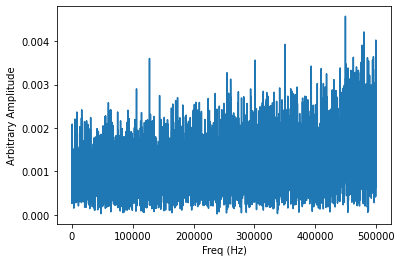

In [8]:
shiftedResult = np.abs(np.fft.fftshift(fftResult))[:numStep // 2] * 1 / numStep #second half is only imaging of first half
#fft result
plt.plot((samplingRate * np.linspace(0,4999,5000)/numStep), shiftedResult)
plt.xlabel("Freq (Hz)")
plt.ylabel("Arbitrary Amplitude")
plt.show()

In [9]:
#plot z over given y
df_slice = df.iloc[5000:7000:500,102*3:152*3]
df_slice.columns = range(df_slice.columns.size)
df_slice

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
5000,0.601418,-18.111846,-0.122751,1.518109,-18.233765,0.017365,2.543462,-18.162762,-0.046036,3.612740,...,-0.032090,5.992938,-17.268426,-0.043056,6.984069,-17.204089,-0.087596,8.073230,-17.148109,-0.107778
5500,0.386546,-18.102287,-0.063999,1.421725,-18.179321,-0.068525,2.331068,-18.147975,-0.164536,3.409954,...,-0.005134,5.958664,-17.353410,-0.050852,6.946235,-17.338141,-0.019364,7.988278,-17.307042,-0.085672
6000,0.486339,-18.167091,-0.000338,1.514404,-18.118775,-0.052927,2.438147,-18.178299,-0.016211,3.436058,...,-0.101888,5.964514,-17.163055,0.062678,6.990602,-17.121367,0.022586,7.895484,-17.170650,-0.079724
6500,0.528838,-18.147337,0.146471,1.412620,-18.201453,-0.044586,2.475618,-18.143786,-0.076967,3.418769,...,-0.060958,6.011658,-17.230785,-0.001833,6.947573,-17.253120,-0.055733,8.057169,-17.265173,-0.051574


FFT(h(x) given t) ~ y
=

In [10]:
#average of FFT results
fftStep = 10

df_slice = df.iloc[0:10000:fftStep, 102*3:152*3]
df_slice.columns = range(df_slice.columns.size)
#fft of z~y
df_slice_z = df_slice.iloc[:,2::3]
df_slice_z_shifted = df_slice_z.sub(df_slice_z.mean(axis=1), axis=0)
df_slice_z_shifted.columns = range(df_slice_z_shifted.columns.size)
df_slice_z_shifted

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,-0.017225,-0.027651,-0.079897,-0.033768,0.009953,-0.019588,-0.038454,0.018990,0.055381,0.005080,...,-0.055211,-0.028059,0.015843,-0.088071,-0.020232,0.002795,0.048261,-0.016224,-0.023694,-0.003410
20,-0.099677,-0.057532,0.019524,0.088649,0.042473,0.056408,0.048399,0.069989,0.009007,-0.050246,...,0.082424,0.019616,0.069030,0.016769,-0.027989,0.005101,0.018198,0.085074,0.038621,0.143095
30,0.039428,0.115644,-0.038037,-0.009894,0.099679,0.001344,-0.058487,-0.032540,-0.022193,0.084835,...,-0.019276,-0.061721,0.074379,0.028588,-0.024443,-0.019195,0.056518,-0.053987,-0.001311,0.066461
40,0.094520,0.081685,0.001250,-0.120801,-0.001619,0.004845,-0.017022,0.018377,0.023348,0.012160,...,0.066823,0.003128,0.043390,0.030192,-0.056990,-0.004400,0.014945,0.032693,-0.003403,0.053363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,0.028718,-0.050202,-0.058486,0.001738,-0.001157,0.077069,0.081011,0.097191,0.055913,-0.036420,...,-0.006382,0.006825,-0.035790,-0.020007,-0.097167,-0.008660,-0.042015,0.067572,-0.007076,-0.011516
9960,0.017755,-0.055247,0.054141,0.102582,0.023324,-0.029650,-0.005295,0.019837,-0.007329,-0.024668,...,0.053872,0.042782,0.080471,-0.019613,0.078662,0.020561,-0.021399,0.056418,-0.080877,-0.004374
9970,0.007393,0.031372,-0.016099,-0.039180,-0.071684,-0.039128,0.010017,-0.006149,-0.020608,0.014984,...,0.033051,0.092564,0.025321,-0.010332,0.107938,-0.045786,0.045998,0.071136,0.094560,0.039125
9980,0.016875,-0.101147,-0.018356,-0.034406,0.026742,0.038623,0.032200,0.079841,0.036370,0.056256,...,0.056094,-0.038609,0.072816,-0.021926,-0.070086,0.024779,0.014246,0.036423,0.011049,0.055178


In [11]:
fftResult = fft(df_slice_z_shifted)
shiftedResult = np.abs(fftResult) * 1 / numStep #second half is only imaging of first half
avgfft = np.zeros(len(fftResult[0]) // 2)
for i in range(0,1000):
#fft result
    avgfft += shiftedResult[i][:len(fftResult[0]) // 2]
avgfft /= 1000
avgfft

array([4.52811399e-20, 7.09574668e-05, 4.26671493e-05, 3.74700334e-05,
       4.13411035e-05, 4.19361904e-05, 3.99893710e-05, 3.77168813e-05,
       3.33003610e-05, 3.26745663e-05, 3.07366265e-05, 3.21962152e-05,
       3.19491416e-05, 3.17124871e-05, 3.01018081e-05, 3.00106534e-05,
       3.00964331e-05, 2.90625058e-05, 3.07184082e-05, 2.95236409e-05,
       2.90670921e-05, 2.98044025e-05, 3.03020097e-05, 2.86798788e-05,
       2.87613487e-05])

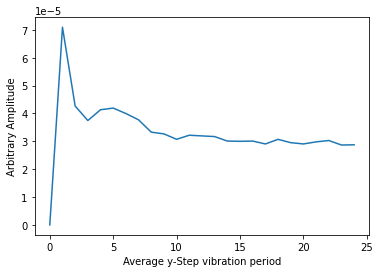

In [12]:
plt.plot((np.linspace(0,24,25)), avgfft)
plt.xlabel("Average y-Step vibration period")
plt.ylabel("Arbitrary Amplitude")
plt.show()

Resolving Translation
====
use the difference in z between a given point and the average of mesh points to get rid of the effect of translation of the whole membrane


In [13]:
z_mean = df_z.mean(axis=1)
z_mean

0        0.000000
1        0.000428
2        0.001131
3        0.000100
4       -0.001756
           ...   
9996     0.006971
9997     0.005845
9998     0.007273
9999     0.006696
10000    0.007839
Length: 10001, dtype: float64

FFT2
===
Plot the relation ship between h(q) and |q|

$$L = \text{side length of membrane}$$
$$(x,y) = \text{position of surface points}$$

$$\vec{q}={L}\begin{pmatrix}{n_{x}}\\{n_{y}}\\\end{pmatrix}$$

Therefore,

$$\vec{q}^2=\frac{1}{L^2}({n_{x}^2}+{n_{y}^2})$$

In [32]:
#h(q) over |q| (using FFT2)
x_scale = 41 # n_x
y_scale = 47 # n_y
time = 5000
L = 40

# extract x y info to np.array at time t
def extract_xy_at_t(df, time, x_scale, y_scale, zmean = 0.0):
    arr_xy = np.zeros([y_scale,x_scale])
    for y in range(0, y_scale):
        for x in range(0, x_scale):
            arr_xy[y][x] = df.iloc[time,(x + y * x_scale)*3+2] - zmean
    return arr_xy

# vector_q = (1/L * row, 1/L * col)
# q2 = ((1/L * row) ** 2 + (1/L * col) ** 2) ** 4 * pi ^ 2
# 4pi^2  = 39.4784176044
def extract_q2(nrow, ncol): #l in um
    arr_q2 = np.zeros([nrow,ncol])
    for row in range(0, nrow):
        for col in range(0, ncol):
            arr_q2[row][col] = ((1/L * row) ** 2 + (1/L * col) ** 2)# 4pi^2
    return arr_q2

arr_xy = extract_xy_at_t(df, time, x_scale, y_scale) #z matrices at x,y
#arr_xy
arr_fft2 = np.abs(np.fft.fft2(arr_xy))
arr_fft2_trimmed = arr_fft2[0:len(arr_fft2)//2][0:len(arr_fft2[0])//2]# rest 3/4 of the matrices are just mirror image
arr_fft2_trimmed 

array([[1.24757298e+02, 1.54986454e+01, 4.48894696e+00, 9.96195317e+00,
        4.98200590e+00, 7.48107337e+00, 6.24949126e+00, 2.21764621e+00,
        3.49226359e+00, 1.49263564e+00, 2.79190223e+00, 2.57880144e+00,
        1.14431138e+00, 3.24300864e+00, 2.23515794e+00, 2.49522911e+00,
        1.04987099e+00, 1.69238724e+00, 1.88171281e+00, 1.03394061e+00,
        3.00229797e+00, 3.00229797e+00, 1.03394061e+00, 1.88171281e+00,
        1.69238724e+00, 1.04987099e+00, 2.49522911e+00, 2.23515794e+00,
        3.24300864e+00, 1.14431138e+00, 2.57880144e+00, 2.79190223e+00,
        1.49263564e+00, 3.49226359e+00, 2.21764621e+00, 6.24949126e+00,
        7.48107337e+00, 4.98200590e+00, 9.96195317e+00, 4.48894696e+00,
        1.54986454e+01],
       [4.49712105e+00, 1.06641070e+00, 6.83015418e+00, 4.06590465e+00,
        2.43111042e+00, 2.39780261e+00, 4.84820324e+00, 3.36502984e+00,
        2.84293752e+00, 1.89492069e+00, 2.65504403e+00, 1.70457199e+00,
        2.45728475e+00, 2.36661261e+00,

In [33]:
arr_sqr_fft2 = (np.power(arr_fft2_trimmed, 2)).ravel() #flatten for plotting
arr_sqr_fft2

array([1.55643835e+04, 2.40208008e+02, 2.01506448e+01, 9.92405109e+01,
       2.48203828e+01, 5.59664588e+01, 3.90561411e+01, 4.91795472e+00,
       1.21959050e+01, 2.22796116e+00, 7.79471804e+00, 6.65021687e+00,
       1.30944852e+00, 1.05171050e+01, 4.99593102e+00, 6.22616829e+00,
       1.10222910e+00, 2.86417459e+00, 3.54084311e+00, 1.06903317e+00,
       9.01379312e+00, 9.01379312e+00, 1.06903317e+00, 3.54084311e+00,
       2.86417459e+00, 1.10222910e+00, 6.22616829e+00, 4.99593102e+00,
       1.05171050e+01, 1.30944852e+00, 6.65021687e+00, 7.79471804e+00,
       2.22796116e+00, 1.21959050e+01, 4.91795472e+00, 3.90561411e+01,
       5.59664588e+01, 2.48203828e+01, 9.92405109e+01, 2.01506448e+01,
       2.40208008e+02, 2.02240978e+01, 1.13723179e+00, 4.66510062e+01,
       1.65315806e+01, 5.91029787e+00, 5.74945734e+00, 2.35050747e+01,
       1.13234259e+01, 8.08229375e+00, 3.59072441e+00, 7.04925878e+00,
       2.90556567e+00, 6.03824836e+00, 5.60085524e+00, 3.61960517e-01,
      

In [34]:
qspace_len = len(arr_sqr_fft2) # get number of points in |q|
arr_sqr_fft2_sum = np.zeros(qspace_len)
numitr = 3000
for time in range(3000,3000+numitr): # average h(q)h*(q) over given time scale: <h(q)h*(q)>
    arr_xy = extract_xy_at_t(df, time, x_scale, y_scale, zmean = z_mean[time]) # resolve translation
    arr_fft2 = np.abs(np.fft.fft2(arr_xy))
    arr_fft2_trimmed = arr_fft2[0:len(arr_fft2)//2][0:len(arr_fft2[0])//2]
    arr_sqr_fft2 = (np.power(arr_fft2_trimmed, 2)).ravel() # For complex number h(q): h(q)h*(q) = |h(q)|^2
    arr_sqr_fft2_sum += arr_sqr_fft2
    if (time % 200 == 0):
        print("Complete:" + str(time))
arr_sqr_fft2_average = arr_sqr_fft2_sum/numitr
arr_sqr_fft2_average

Complete:5000
Complete:5200
Complete:5400
Complete:5600
Complete:5800
Complete:6000
Complete:6200
Complete:6400
Complete:6600
Complete:6800


array([1.11256321e-26, 2.34173135e+02, 7.49243298e+01, 3.65400722e+01,
       2.78822428e+01, 2.32937619e+01, 1.48097493e+01, 9.59848342e+00,
       7.28125015e+00, 6.48573541e+00, 6.05514831e+00, 6.16411276e+00,
       6.09421133e+00, 5.04684421e+00, 4.47042644e+00, 4.50534027e+00,
       4.65383683e+00, 4.63284454e+00, 4.54571714e+00, 4.31949971e+00,
       4.18611818e+00, 4.18611818e+00, 4.31949971e+00, 4.54571714e+00,
       4.63284454e+00, 4.65383683e+00, 4.50534027e+00, 4.47042644e+00,
       5.04684421e+00, 6.09421133e+00, 6.16411276e+00, 6.05514831e+00,
       6.48573541e+00, 7.28125015e+00, 9.59848342e+00, 1.48097493e+01,
       2.32937619e+01, 2.78822428e+01, 3.65400722e+01, 7.49243298e+01,
       2.34173135e+02, 3.38661186e+02, 1.45256312e+02, 4.36803538e+01,
       3.47384363e+01, 2.44799248e+01, 1.97693447e+01, 1.42210159e+01,
       1.02671896e+01, 7.22077412e+00, 6.14140654e+00, 6.40021543e+00,
       6.12370899e+00, 5.58056811e+00, 4.97079520e+00, 4.61355637e+00,
      

In [35]:
#flatten q2 for plotting
q2 = extract_q2(len(arr_fft2_trimmed),len(arr_fft2_trimmed[0]))
arr_q2_flatten = q2.ravel()
arr_q2_flatten

array([0.000000e+00, 6.250000e-04, 2.500000e-03, 5.625000e-03,
       1.000000e-02, 1.562500e-02, 2.250000e-02, 3.062500e-02,
       4.000000e-02, 5.062500e-02, 6.250000e-02, 7.562500e-02,
       9.000000e-02, 1.056250e-01, 1.225000e-01, 1.406250e-01,
       1.600000e-01, 1.806250e-01, 2.025000e-01, 2.256250e-01,
       2.500000e-01, 2.756250e-01, 3.025000e-01, 3.306250e-01,
       3.600000e-01, 3.906250e-01, 4.225000e-01, 4.556250e-01,
       4.900000e-01, 5.256250e-01, 5.625000e-01, 6.006250e-01,
       6.400000e-01, 6.806250e-01, 7.225000e-01, 7.656250e-01,
       8.100000e-01, 8.556250e-01, 9.025000e-01, 9.506250e-01,
       1.000000e+00, 6.250000e-04, 1.250000e-03, 3.125000e-03,
       6.250000e-03, 1.062500e-02, 1.625000e-02, 2.312500e-02,
       3.125000e-02, 4.062500e-02, 5.125000e-02, 6.312500e-02,
       7.625000e-02, 9.062500e-02, 1.062500e-01, 1.231250e-01,
       1.412500e-01, 1.606250e-01, 1.812500e-01, 2.031250e-01,
       2.262500e-01, 2.506250e-01, 2.762500e-01, 3.0312

(0.0, 2.0)

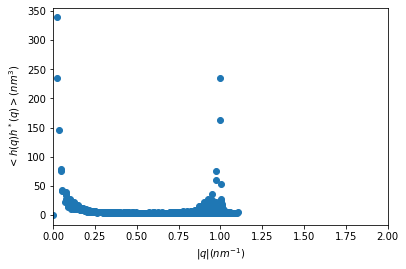

In [36]:
#plot in q space
plt.scatter(np.power(arr_q2_flatten, 0.5), arr_sqr_fft2_average) # take sqrt of q^2 to get |q|
plt.ylabel('$<h(q)h^*(q)> (nm^3)$')
plt.xlabel('$|q| (nm^{-1})$')
plt.xlim([0,2])

FF2 - Trim out the periodic region
===

In [51]:
#h(q) over |q| (using FFT2)
x_scale = 41
y_scale = 47
time = 5000
L = (x_scale + y_scale * 0.86602540378)/2 -5

# extract x y info to np.array at time t
def extract_xy_at_t(df, time, x_scale, y_scale, zmean = 0.0):
    arr_xy = np.zeros([y_scale,x_scale])
    for y in range(0, y_scale):
        for x in range(0, x_scale):
            arr_xy[y][x] = df.iloc[time,(x + y * x_scale)*3+2] - zmean
    return arr_xy

# vector_q = (1/L * row, 1/L * col)
# q2 = (1/L * row) ** 2 + (1/L * col) ** 2
def extract_q2(nrow, ncol): #l in um
    arr_q2 = np.zeros([nrow,ncol])
    for row in range(0, nrow):
        for col in range(0, ncol):
            arr_q2[row][col] = ((1/L * row) ** 2 + (1/L * col) ** 2) * 39.4784176044
    return arr_q2

In [52]:
arr_periodic_trimmed = []
for y in range(0,y_scale-4):
    for x in range(0,x_scale-4):
        for i in range(0,3):
            arr_periodic_trimmed.append((x+y*x_scale)*3+i)
arr_periodic_trimmed

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,


In [53]:
df_periodic_trimmed = df.iloc[:,arr_periodic_trimmed]
df_periodic_trimmed.columns = range(0,len(df_periodic_trimmed.columns))
df_periodic_trimmed

,0,1,2,3,4,5,6,7,8,9,...,4763,4764,4765,4766,4767,4768,4769,4770,4771,4772
0,-19.500000,-19.918584,0.000000,-18.500000,-19.918584,0.000000,-17.500000,-19.918584,0.000000,-16.500000,...,0.000000,14.500000,16.454483,0.000000,15.500000,16.454483,0.000000,16.500000,16.454483,0.000000
1,-19.569135,-19.899881,0.105935,-18.546277,-19.939072,-0.050589,-17.516614,-19.868552,-0.002827,-16.433511,...,0.076545,14.514781,16.430862,0.027952,15.504850,16.471550,-0.061759,16.494020,16.474891,-0.034063
2,-19.532303,-19.877809,0.024413,-18.620416,-19.883343,-0.035546,-17.451539,-19.887849,-0.004536,-16.455569,...,0.003449,14.510028,16.367479,0.072442,15.467780,16.492287,0.007512,16.513129,16.488476,0.041185
3,-19.508036,-19.855525,0.037458,-18.387855,-19.995617,-0.066175,-17.547501,-19.913736,0.019761,-16.509680,...,-0.013307,14.578633,16.416667,0.020483,15.532339,16.446633,0.053231,16.437845,16.417876,0.031614
4,-19.501203,-19.988420,0.072062,-18.548097,-19.963914,-0.007384,-17.521166,-20.031040,0.116213,-16.470501,...,-0.011336,14.530522,16.456767,0.058701,15.478895,16.444770,0.007709,16.474353,16.452380,0.076644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-19.415719,-19.839919,-0.026641,-18.394675,-19.836268,0.013418,-17.501013,-19.852804,0.008303,-16.555161,...,0.094986,14.509814,16.535705,-0.020578,15.642901,16.596691,0.028626,16.577034,16.465808,-0.020134
9997,-19.494883,-19.889960,-0.047906,-18.539017,-19.912553,0.128016,-17.520773,-19.837124,0.051368,-16.597045,...,0.071726,14.529347,16.534156,-0.021622,15.534636,16.560725,0.006509,16.592345,16.502939,0.033865
9998,-19.478932,-19.867807,0.020954,-18.524130,-19.800755,-0.076186,-17.548313,-19.842550,0.006831,-16.555980,...,0.035084,14.558849,16.575980,0.153759,15.560563,16.479499,0.008540,16.669714,16.532626,0.008734
9999,-19.457104,-19.863386,0.098224,-18.344261,-19.886064,-0.005942,-17.532910,-19.917413,0.018212,-16.529061,...,0.002451,14.498780,16.458721,0.059447,15.645814,16.496017,0.088697,16.462118,16.499753,-0.042228


In [54]:
qspace_len = 666 # get number of points in |q|
arr_sqr_fft2_sum = np.zeros(qspace_len)
numitr = 2000
for time in range(5000,5000+numitr): # average h(q)h*(q) over given time scale: <h(q)h*(q)>
    arr_xy = extract_xy_at_t(df_periodic_trimmed, time, x_scale-4, y_scale-4, zmean = z_mean[time]) # resolve translation
    arr_fft2 = np.abs(np.fft.fft2(arr_xy))
    arr_fft2_trimmed = arr_fft2[0:len(arr_fft2)//2][0:len(arr_fft2[0])//2]
    arr_sqr_fft2 = (np.power(arr_fft2_trimmed, 2)).ravel() # For complex number h(q): h(q)h*(q) = |h(q)|^2
    arr_sqr_fft2_sum += arr_sqr_fft2
    if (time % 200 == 0):
        print("Complete:" + str(time))
arr_sqr_fft2_average = arr_sqr_fft2_sum/numitr
arr_sqr_fft2_average

Complete:5000
Complete:5200
Complete:5400
Complete:5600
Complete:5800
Complete:6000
Complete:6200
Complete:6400
Complete:6600
Complete:6800


array([  8.41278007, 169.33759574,  60.487074  ,  23.92494188,
        13.20905302,   9.27337548,   6.5919897 ,   6.01669086,
         5.54269954,   4.76392174,   4.39681167,   4.29820922,
         3.93005504,   3.61364164,   3.69590204,   3.51595371,
         3.48422993,   3.34526776,   3.33502332,   3.33502332,
         3.34526776,   3.48422993,   3.51595371,   3.69590204,
         3.61364164,   3.93005504,   4.29820922,   4.39681167,
         4.76392174,   5.54269954,   6.01669086,   6.5919897 ,
         9.27337548,  13.20905302,  23.92494188,  60.487074  ,
       169.33759574, 231.50625038, 116.87950409,  45.24657963,
        24.12841722,  12.42020783,   8.9291971 ,   7.22681755,
         6.39845409,   5.40577988,   4.93057971,   4.39455119,
         4.13479395,   3.80547098,   3.58379502,   3.51443227,
         3.46813175,   3.41644009,   3.27721491,   3.26912158,
         3.28356934,   3.28243219,   3.44505122,   3.41544595,
         3.4066438 ,   3.60699453,   3.83161378,   4.13

In [55]:
#flatten q2 for plotting
q2 = extract_q2(len(arr_fft2_trimmed),len(arr_fft2_trimmed[0]))
arr_q2_flatten = q2.ravel()
arr_q2_flatten

array([0.00000000e+00, 3.07144487e-02, 1.22857795e-01, 2.76430039e-01,
       4.91431180e-01, 7.67861219e-01, 1.10572015e+00, 1.50500799e+00,
       1.96572472e+00, 2.48787035e+00, 3.07144487e+00, 3.71644830e+00,
       4.42288062e+00, 5.19074184e+00, 6.02003195e+00, 6.91075097e+00,
       7.86289888e+00, 8.87647569e+00, 9.95148139e+00, 1.10879160e+01,
       1.22857795e+01, 1.35450719e+01, 1.48657932e+01, 1.62479434e+01,
       1.76915225e+01, 1.91965305e+01, 2.07629673e+01, 2.23908331e+01,
       2.40801278e+01, 2.58308514e+01, 2.76430039e+01, 2.95165852e+01,
       3.14515955e+01, 3.34480347e+01, 3.55059027e+01, 3.76251997e+01,
       3.98059256e+01, 3.07144487e-02, 6.14288975e-02, 1.53572244e-01,
       3.07144487e-01, 5.22145629e-01, 7.98575667e-01, 1.13643460e+00,
       1.53572244e+00, 1.99643917e+00, 2.51858480e+00, 3.10215932e+00,
       3.74716275e+00, 4.45359507e+00, 5.22145629e+00, 6.05074640e+00,
       6.94146542e+00, 7.89361333e+00, 8.90719013e+00, 9.98219584e+00,
      

In [56]:
len(arr_q2_flatten)

666

Text(0.5, 0, '$|q| (nm^{-1})$')

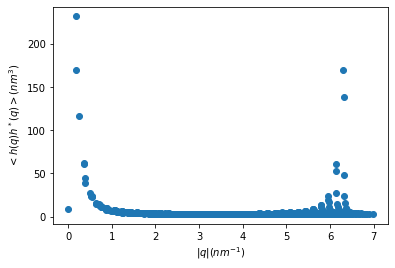

In [57]:
#plot in q space
plt.scatter(np.power(arr_q2_flatten, 0.5), arr_sqr_fft2_average) # take sqrt of q^2 to get |q|
plt.ylabel('$<h(q)h^*(q)> (nm^3)$')
plt.xlabel('$|q| (nm^{-1})$')

6.089784373884393


/var/folders/sb/kq7xx1cx5cq2j75_xd4w1nd40000gn/T/ipykernel_18823/3355172422.py:2: RuntimeWarning: divide by zero encountered in power
  x = np.power(arr_q2_flatten, -1)[1:]


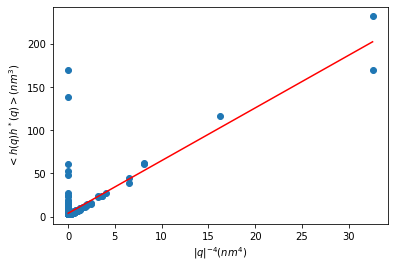

In [59]:
#plot in q space
x = np.power(arr_q2_flatten, -1)[1:]
y = arr_sqr_fft2_average[1:]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, "r")
plt.scatter(x, y) # take sqrt of q^2 to get |q|
plt.ylabel('$<h(q)h^*(q)> (nm^3)$')
plt.xlabel('$|q|^{-4} (nm^{4})$')
print(m)

In [60]:
#binned statistic
from scipy.stats import binned_statistic

x = np.power(arr_q2_flatten, 0.5)[1:]
y = arr_sqr_fft2_average[1:]
mean_stat = binned_statistic(x, y, 
                             statistic='mean', 
                             bins=30)

print(mean_stat.statistic)
# array([0.198,   nan, 0.28 , 0.355, 0.265])
print(mean_stat.bin_edges)
# array([0. , 0.5, 1. , 1.5, 2. , 2.5])
#mean_stat.binnumber
# array([1, 1, 1, ..., 4, 5, 5])

[103.56274743  24.51327998  13.04312839   8.05777192   5.82333954
   4.84006231   4.2996742    3.95016836   3.70272495   3.50739593
   3.45137546   3.38541854   3.35677119   3.29323446   3.28239841
   3.28022166   3.29279643   3.33006572   3.39151682   3.47658168
   3.72313863   3.79466369   3.94757092   4.49368301   5.49329326
   6.52472387  10.67610912  21.59183264   3.7916563    3.52302872]
[0.17525538 0.40198945 0.62872352 0.85545759 1.08219166 1.30892573
 1.5356598  1.76239387 1.98912795 2.21586202 2.44259609 2.66933016
 2.89606423 3.1227983  3.34953237 3.57626644 3.80300051 4.02973458
 4.25646865 4.48320272 4.70993679 4.93667086 5.16340493 5.390139
 5.61687307 5.84360714 6.07034121 6.29707528 6.52380935 6.75054343
 6.9772775 ]


In [61]:
def getBinMidpoint(bin_edges):
    step = bin_edges[1] - bin_edges[0]
    print(step)
    return (bin_edges + step)[0:len(bin_edges)-1]

0.22673407047604022


Text(0.5, 0, '$|q| (nm^{-1})$')

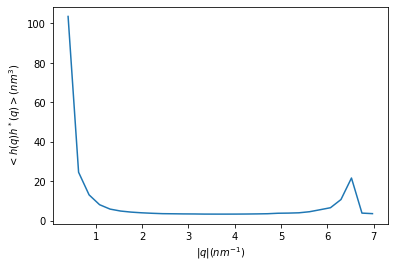

In [62]:
#plot in q space
plt.plot(getBinMidpoint(mean_stat.bin_edges), mean_stat.statistic) # take sqrt of q^2 to get |q|
plt.ylabel('$<h(q)h^*(q)> (nm^3)$')
plt.xlabel('$|q| (nm^{-1})$')

In [48]:
df_s = pd.DataFrame({"q":getBinMidpoint(mean_stat.bin_edges),"hq":mean_stat.statistic})

0.03608584808358852


In [49]:
df_s

,q,hq
0,0.063979,103.562747
1,0.100064,24.513280
2,0.136150,13.043128
3,0.172236,8.057772
4,0.208322,5.823340
5,0.244408,4.840062
6,0.280494,4.299674
7,0.316580,3.950168
8,0.352665,3.702725
9,0.388751,3.507396


In [50]:
df_s.to_pickle("4040.pkl")